Implementation of Linear Regression to predict house prices using Housing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
df=pd.read_csv('Housing.csv')
df.drop(columns=['furnishingstatus'],inplace=True)
#LinearRegression model needs numerical input only. It can't process yes/no values
#So, we'll have to convert yes/no values to 0/1
df.replace({'yes':1,'no':0},inplace=True)
df.head()

<ipython-input-28-5dc3419a2198>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes':1,'no':0},inplace=True)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [29]:
#define features(X) and target(y)
X=df[['area','bedrooms','bathrooms','stories', 'parking','airconditioning','guestroom','basement','hotwaterheating','prefarea','mainroad']]
y=df['price']

In [30]:
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
#evaluate and make predictions
predict_y = model.predict(X_test)
mse=mean_squared_error(y_test,predict_y)
r2=r2_score(y_test,predict_y)
print('Mean Squared Error: ', mse)
print('r2: ', r2)

Mean Squared Error:  1800793719718.9668
r2:  0.6437296086614117


Metrics suggest better pre-processing is required to be done on the dataset 

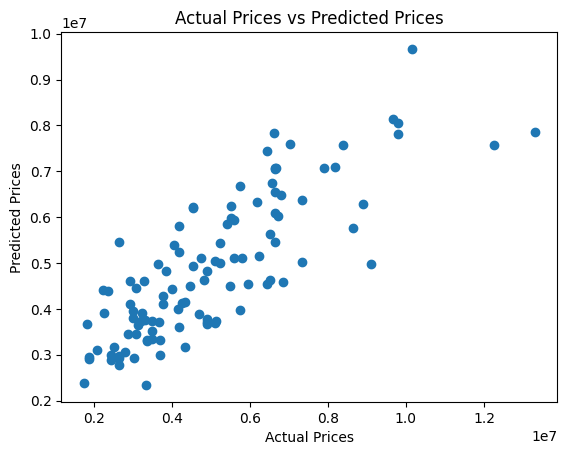

In [33]:
#visualize predictions
plt.scatter(y_test, predict_y)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()